**Maya Purohit**

Fall 2023

CS 251: Data Analysis and Visualization

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 14})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

# Project 4 | Principal component analysis

Principal component analysis (PCA) is a technique to reduce the dimensionality of a dataset while losing the least amount of information about the data variables. Before implementing PCA and exploring its use with different datasets, you will explore what happens when you manually reduce the dimensionality of a mystery dataset from 3D to 2D.

In [3]:
from data_transformations import normalize, center, rotation_matrix_3d
from scatter3d import scatter3dplot

## Task 1: Dimensionality reduction by hand

### 1a. Load and visualize mystery dataset

Load in the mystery dataset (`mystery.csv`) as a panda DataFrame below. Print out the header and the first five rows of data. You should see:

```
	       x	        y	        z	   color
0	6.183216	86.707892	90.551566	4.810163
1	0.969658	16.972285	137.976605	9.442446
2	0.727076	57.112193	139.795502	9.384942
3	8.433828	30.348513	113.600202	5.973703
4	8.188306	133.978413	120.671505	6.051754
```

**Note:** The `mystery.csv` does not have a types row. Going forward, csv files we work with won't have the types row.

In [4]:
df = pd.read_csv("data/mystery.csv")
print(df.head())

          x           y           z     color
0  6.183216   86.707892   90.551566  4.810163
1  0.969658   16.972285  137.976605  9.442446
2  0.727076   57.112193  139.795502  9.384942
3  8.433828   30.348513  113.600202  5.973703
4  8.188306  133.978413  120.671505  6.051754


Select the x, y, and z variables from the pandas DataFrame and [convert it to a numpy ndarray](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html).

In [5]:
part = df[["x","y","z"]]
numData = part.to_numpy() #convert it to a numpy array


Use the provided `scatter3dplot` function in `scatter3d.py` to make a 3D scatter plot of the `x`, `y`, and `z` numeric variables. Set the color keyword argument to the `color` variable value from the pandas DataFrame (`len=2000`).

Set the plot bounds (`lims` keyword argument) so that the **entire** dataset appears within the 3D scatter plot. In the provided `scatter3dplot` function, the plot limits that you pass in apply to **all** x, y, and z axes. It may be helpful to print out the min and max of each variable and make sure the bounds that you select encompass all the samples.

Mins: [0. 0. 0.]
Maxs: [ 12.83894 140.45556 284.51232]


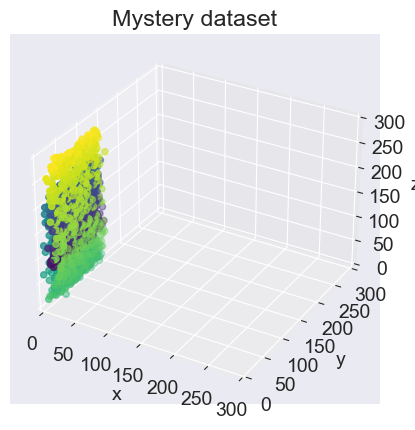

In [6]:
print("Mins:", np.min(numData, axis = 0)) #print the mins and the maxs to see the bounds for the graph
print("Maxs:", np.max(numData, axis = 0))
scatter3dplot(numData, color = df["color"], lims = (0, 300))



### 1b. Preprocess mystery dataset (1/2): Normalize

Implement the `normalize` function in `data_transformations.py` then perform min-max normalization on the `x`, `y`, and `z` values in the mystery dataset.

Use `scatter3dplot` to make a 3D scatterplot of the normalized dataset. Set the color as before, but update the plot limits appropriately based on the new normalized data range.

<!-- In **two lines of code** below, print out the mins and maxes of **each variable** and verify that the data variables are normalized as expected. As above, you should print two length-3 ndarrays — the min and max of each variable (x, y, z) -->

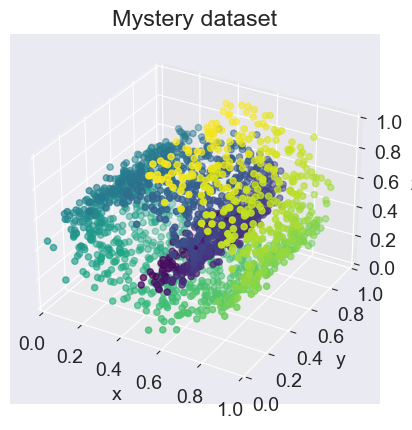

In [7]:
normData = normalize(numData)

scatter3dplot(normData, color = df["color"], lims = (0,1)) #now the lims should be 0 and 1 because we normalized the data

### 1c. Questions

**Question 1:** What are the min and max values of each variable in the normalized dataset?

**Question 2:** Describe the shape and structure of the normalized mystery dataset. **Why** was the appearance of the dataset not obvious when plotting the raw un-normalized dataset?

**Answer 1:** The min of each variable is 0 and the max of each variable is now 1. Performing a min-max normalization ensures that the range of all of the data variables will be (0,1) by using translation and scaling. Therefore, the minimum and the maximum of each variable should be 0 and 1 respectively. 

**Answer 2:** 
The shape of the normalized mystery dataset is a spiral in 3D. The spiral can be seen in the x-z plane and the y axis gives the spiral depth. The appearance of the shape is much more obvious when it is normalized because the range of each variable has been set between 0 and 1. When the data is unnormalized, the maximum of the z variable is much larger than the maximum of the x and y variable (we can see this above). This results in the data being pressed to one side of the graph with its shape indiscernable to the viewer. If all of the values are normalized into the same range, the shape will be much more clear and the data will be much more visible. 

In [8]:
# verifying min-max
print("The mins are:", normData.min(axis = 0), "and should be [0. 0. 0.]")
print("The maxs are:", normData.max(axis = 0), "and should be [1. 1. 1.]") #check to make sure that the normalization was done properly


The mins are: [0. 0. 0.] and should be [0. 0. 0.]
The maxs are: [1. 1. 1.] and should be [1. 1. 1.]


### 1d. Preprocess mystery dataset (2/2): Center

Implement the `center` function in `data_transformations.py` then center the `x`, `y`, and `z` values in the **normalized** mystery dataset. Then use `scatter3dplot` to make a 3D scatterplot of the normalized and centered dataset. Set the color as before.

Update the plot limits appropriately based on the new expected data range so that all data samples appear in the plot, but minimize "filler space" around the dataset in the plot (*i.e. we want to view the full dataset close-up in detail*).

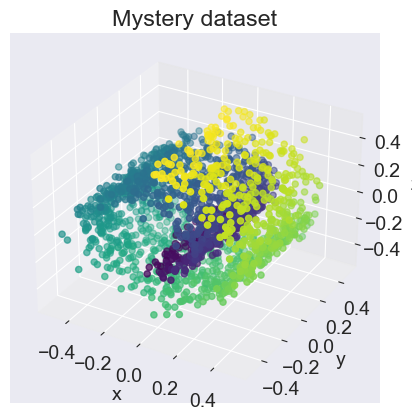

In [10]:
centNormData = center(normData) #center using the center function
scatter3dplot(centNormData, color = df["color"], lims = (-0.55, 0.55))


### 1e. Questions

**Question 3:** Check to make sure that the normalized mystery dataset is now also centered. **Note:** It is totally fine if you have some `-0.` values.

**Question 4:** What are the min and max values of each variable in the normalized and centered dataset? Briefly describe **why** these new min and max values make sense.

**Answer 3:** 
To verify that the data is centered, I printed the mean for each column of the dataset. If it was centered correctly, the mean of each column should be zero because we substracting the mean of each variable from each value in the variable column. As you can see below, the mean of each variable is 0, meaning that the data was centered properly.

**Answer 4:** 

The max and min values have been printed below. Before centering the data, we perform a min-max normalization. This means that the mean of each column before centering is between 0 and 1 because the range of the values for all of the columns is (0,1). When we center the data, we are subtracting the mean from all of the data points in the normalized data array. Therefore, the min should be 0 - (mean) and the max should be 1 - (mean). When substracting the min from the max, we should still get 1 because centering is only a translation and does not change the range of the min and max. We can see that this is true in the cell below. These new min and max values make sense because they are equal to their original values (0 and 1 respectively) - mean of their column. They add up to 1 showing that they have been calculated correctly.


In [11]:
# Verify centered property

print("Mean:", centNormData.mean(axis = 0))


# Verify min-maxes
print("Mins:", centNormData.min(axis = 0))
print("Maxs:", centNormData.max(axis = 0))
print("Substract Min from Max: ", centNormData.max(axis = 0) - centNormData.min(axis = 0))


Mean: [0. 0. 0.]
Mins: [-0.50103 -0.49286 -0.47661]
Maxs: [0.49897 0.50714 0.52339]
Substract Min from Max:  [1. 1. 1.]


### 1f. Projecting mystery dataset from 3D to 2D (1/2)

In the cell below, create a 2D scatter plot showing just the `x` and `y` variables in the normalized and centered mystery dataset.

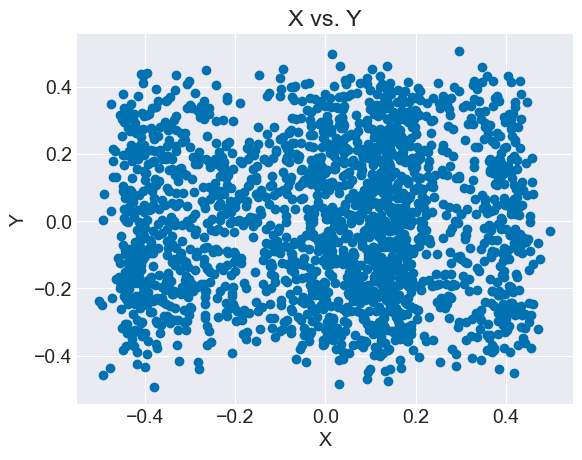

In [12]:
plt.scatter(centNormData[:,0], centNormData[:,1]) #plot the x and the y 
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs. Y")
plt.show()

### 1g. Questions

**Question 5:** Based on your 2D scatter plot, does the projection that you performed in Task 1f look like a "good" way to reduce the dimensionality of the dataset from 3D to 2D? **Why?**


**Answer 5:**

This projection does not look like a good way to reduce the dimensionality of the dataset because it does not preserve the most important part of the shape. The dataset has a spiral shape when it is represented in 3D. We want the spiral shape to be preserved when we reduce the dimensions to 2D. Therefore, since the projection above seems to be looking at the spiral from the top, it is not a good way to reduce the dimensionality. This projection does not preserve the most important part of the data, meaning it was not a good principle components analysis.

### 1h. Implement `rotation_matrix_3d`

In `data_transformations.py` implement `rotation_matrix_3d` then test it below.

#### Test `rotation_matrix_3d`

In [13]:
# Test rotate about x axis
print('Your 3D Rotation matrix about x axis by +30° is:')
print(rotation_matrix_3d(30, axis='x'))
print('and should be:')
print('''[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]''')

# Test rotate about y axis
print('Your 3D Rotation matrix about y axis by -15° is:')
print(rotation_matrix_3d(-15, axis='y'))
print('and should be:')
print('''[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]''')

# Test rotate about z axis
print('Your 3D Rotation matrix about z axis by 45° is:')
print(rotation_matrix_3d(45, axis='z'))
print('and should be:')
print('''[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]''')

Your 3D Rotation matrix about x axis by +30° is:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
and should be:
[[ 1.       0.       0.     ]
 [ 0.       0.86603 -0.5    ]
 [ 0.       0.5      0.86603]]
Your 3D Rotation matrix about y axis by -15° is:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
and should be:
[[ 0.96593  0.      -0.25882]
 [ 0.       1.       0.     ]
 [ 0.25882  0.       0.96593]]
Your 3D Rotation matrix about z axis by 45° is:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]
and should be:
[[ 0.70711 -0.70711  0.     ]
 [ 0.70711  0.70711  0.     ]
 [ 0.       0.       1.     ]]


### 1i. Projecting mystery dataset from 3D to 2D (2/2)

Reduce the dimensionality of the **normalized and centered** mystery dataset from 3D -> 2D while doing a better job at preserving the "rolled" shape than in Task 1f. Do this below by projecting the 3D dataset into the (`x`, `y`) plane just like you did in Task 1f (i.e. make a 2D scatter plot of `x` and `y`), but this time rotate the 3D normalized and centered mystery dataset **beforehand**. The amount of 3D rotation and the axis about which it is performed is up to you.

Your goal is to rotate the 3D dataset so that the "rolled" spiral structure (*i.e. the key shape of the dataset*) comes into view of the `x`-`y` plane/axis when you project the dataset down into 2D via your 2D scatter plot.

The cell below should show a 2D scatter plot with the spiral/rolled structure clearly visible.

**Note:** It should be helpful to plot the normalized and centered mystery dataset in 3D with `scatter3dplot` before and after the rotation.

In [15]:
rotMat = rotation_matrix_3d(90, "x" ) #rotate by 90 degrees around the x-axis
xyz_rot = (rotMat @ centNormData.T).T #multiply the data matrix by the roation matrix

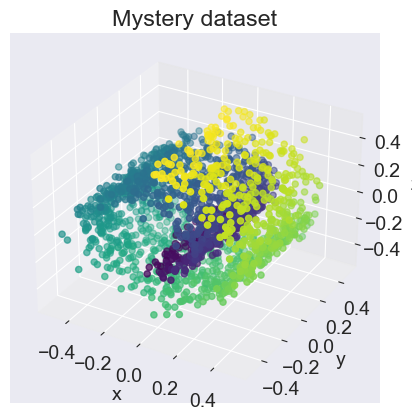

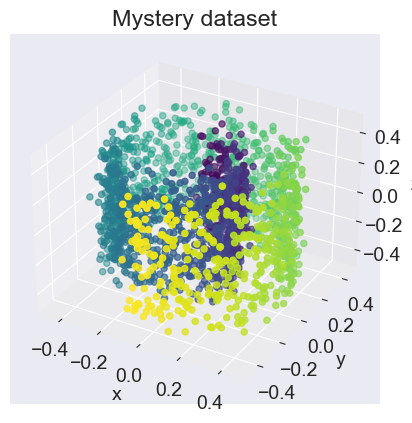

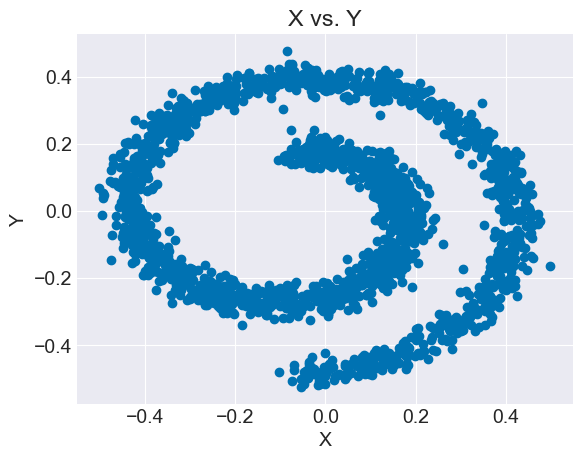

In [16]:
scatter3dplot(centNormData, color = df["color"], lims = (-0.55, 0.55)) #plot original centered data
scatter3dplot(xyz_rot, color=df['color'], lims=(-0.5, 0.5)) #plot the rotated data
plt.scatter(xyz_rot[:,0], xyz_rot[:,1]) #plot the projection by removing the z axis and plotting only the x and y axis
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs. Y")
plt.show()